# Polynomial Regression 

<br>

We can use a liinear model to fit non linear data. A simple way to do this is to add powers of each features as new features, then train a linear model on this extended set of features. This is called _Polynomial Regression._

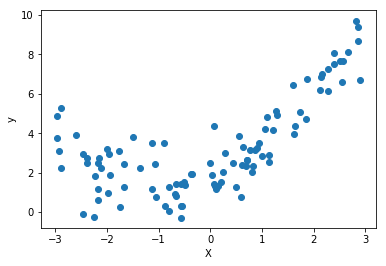

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X+2+np.random.randn(m,1)
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()